In [163]:
import pandas as pd
import numpy as np
import requests
import string
string.punctuation
import matplotlib
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup


In [7]:
datafile= "C:\\Users\\ronyh\\Desktop\\BD Python\\destinations_LP_crawler_Ex5.csv"

In [8]:
data = pd.read_csv(datafile,encoding='ISO-8859-1')


In [9]:
key= ""

In [10]:
def capital(city):
        url = "https://maps.googleapis.com/maps/api/geocode/json?address=%s&key=%s" % (city, key)
        response = requests.get(url)
        response_json = response.json()
        long = len(response_json["results"][0]['address_components'])-1
        country = response_json["results"][0]['address_components'][long]['long_name']
        try:
            shit = int(country.split()[0])
            country = response_json["results"][0]['address_components'][long-1]['long_name']
            return(country)
        except:
            return(country)
    

In [11]:
data["Country"] = data['city_LP'].apply(capital)
data

,city,city_LP,Country
0,Antalya,mediterranean-coast/antalya,Turkey
1,Athens,Athens,Greece
2,Ayia-napa,the-republic-of-cyprus/Agia-napa,Cyprus
3,Bangkok,Bangkok,Thailand
4,Barcelona,Barcelona,Spain
...,...,...,...
71,Venice,Venice,Italy
72,Vienna,Vienna,Austria
73,Warsaw,Warsaw,Poland
74,Zakynthos,Zakynthos,Greece


In [13]:
def description(city_LP,country):
    url="https://www.lonelyplanet.com/"+country+"/"+city_LP
    html = requests.get(url)
    if not html.status_code == 200:
        return None
    results_page = BeautifulSoup(html.content, 'html.parser')
    #des = results_page.find_all('div',class_="readMore_content___5EuR relative overflow-hidden max-h-96 is-max wysiwyg")
    des= results_page.find('div',{'class':'readMore_content___5EuR relative overflow-hidden max-h-96 is-max wysiwyg'}).get_text()
    des=des.replace("â€™","'")
    return(des)


In [14]:
data["Description"] = data.apply(lambda data: description(data.city_LP, data.Country), axis=1)
data

,city,city_LP,Country,Description
0,Antalya,mediterranean-coast/antalya,Turkey,Once seen simply as the gateway to the Turkish...
1,Athens,Athens,Greece,"With equal measures of grunge and grace, Athen..."
2,Ayia-napa,the-republic-of-cyprus/Agia-napa,Cyprus,Endless blue-sky days and a coastline riddled ...
3,Bangkok,Bangkok,Thailand,"Same same, but different. This Thailish T-shir..."
4,Barcelona,Barcelona,Spain,Barcelona is an enchanting seaside city with b...
...,...,...,...,...
71,Venice,Venice,Italy,Imagine the audacity of building a city of mar...
72,Vienna,Vienna,Austria,Baroque streetscapes and imperial palaces set ...
73,Warsaw,Warsaw,Poland,"A phoenix arisen from the ashes, Poland's capi..."
74,Zakynthos,Zakynthos,Greece,"Zakynthos, also known by its Italian name Zant..."


In [24]:
def count(des):
    des=str(des)
    word_list=des.split()
    num=len(word_list)
    return(num)
    

In [25]:
data["num_of_words"]=data.apply(lambda data: count(data.Description), axis=1)
data

,city,city_LP,Country,Description,num_of_words
0,Antalya,mediterranean-coast/antalya,Turkey,Once seen simply as the gateway to the Turkish...,112
1,Athens,Athens,Greece,"With equal measures of grunge and grace, Athen...",393
2,Ayia-napa,the-republic-of-cyprus/Agia-napa,Cyprus,Endless blue-sky days and a coastline riddled ...,147
3,Bangkok,Bangkok,Thailand,"Same same, but different. This Thailish T-shir...",398
4,Barcelona,Barcelona,Spain,Barcelona is an enchanting seaside city with b...,427
...,...,...,...,...,...
71,Venice,Venice,Italy,Imagine the audacity of building a city of mar...,420
72,Vienna,Vienna,Austria,Baroque streetscapes and imperial palaces set ...,418
73,Warsaw,Warsaw,Poland,"A phoenix arisen from the ashes, Poland's capi...",406
74,Zakynthos,Zakynthos,Greece,"Zakynthos, also known by its Italian name Zant...",118


In [48]:
def remove_punctuation(text):
    n="\n"
    no_punct=[words for words in text if words not in string.punctuation and words not in n]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct

def count_clean(des):
    des=str(des)
    des= remove_punctuation(des)
    word_list=des.split()
    num=len(word_list)
    return(num)

In [49]:
data["No_punct_description"]=data.apply(lambda data: count_clean(data.Description), axis=1)
data

,city,city_LP,Country,Description,num_of_words,No_punct_description
0,Antalya,mediterranean-coast/antalya,Turkey,Once seen simply as the gateway to the Turkish...,112,112
1,Athens,Athens,Greece,"With equal measures of grunge and grace, Athen...",393,393
2,Ayia-napa,the-republic-of-cyprus/Agia-napa,Cyprus,Endless blue-sky days and a coastline riddled ...,147,147
3,Bangkok,Bangkok,Thailand,"Same same, but different. This Thailish T-shir...",398,390
4,Barcelona,Barcelona,Spain,Barcelona is an enchanting seaside city with b...,427,419
...,...,...,...,...,...,...
71,Venice,Venice,Italy,Imagine the audacity of building a city of mar...,420,412
72,Vienna,Vienna,Austria,Baroque streetscapes and imperial palaces set ...,418,409
73,Warsaw,Warsaw,Poland,"A phoenix arisen from the ashes, Poland's capi...",406,405
74,Zakynthos,Zakynthos,Greece,"Zakynthos, also known by its Italian name Zant...",118,118


In [110]:
res=(data.Description.str.count("restaurant "))
data["has_restaurants"]=res
data=data.fillna(0)
data 

,city,city_LP,Country,Description,num_of_words,No_punct_description,has_restaurants
0,Antalya,mediterranean-coast/antalya,Turkey,Once seen simply as the gateway to the Turkish...,112,112,0.0
1,Athens,Athens,Greece,"With equal measures of grunge and grace, Athen...",393,393,1.0
2,Ayia-napa,the-republic-of-cyprus/Agia-napa,Cyprus,Endless blue-sky days and a coastline riddled ...,147,147,0.0
3,Bangkok,Bangkok,Thailand,"Same same, but different. This Thailish T-shir...",398,390,1.0
4,Barcelona,Barcelona,Spain,Barcelona is an enchanting seaside city with b...,427,419,1.0
...,...,...,...,...,...,...,...
71,Venice,Venice,Italy,Imagine the audacity of building a city of mar...,420,412,0.0
72,Vienna,Vienna,Austria,Baroque streetscapes and imperial palaces set ...,418,409,1.0
73,Warsaw,Warsaw,Poland,"A phoenix arisen from the ashes, Poland's capi...",406,405,1.0
74,Zakynthos,Zakynthos,Greece,"Zakynthos, also known by its Italian name Zant...",118,118,0.0


In [115]:
mus=(data.Description.str.count("museum "))
data["has_museums"]=mus
data=data.fillna(0)
data

,city,city_LP,Country,Description,num_of_words,No_punct_description,has_restaurants,has_museums
0,Antalya,mediterranean-coast/antalya,Turkey,Once seen simply as the gateway to the Turkish...,112,112,0.0,1.0
1,Athens,Athens,Greece,"With equal measures of grunge and grace, Athen...",393,393,1.0,0.0
2,Ayia-napa,the-republic-of-cyprus/Agia-napa,Cyprus,Endless blue-sky days and a coastline riddled ...,147,147,0.0,0.0
3,Bangkok,Bangkok,Thailand,"Same same, but different. This Thailish T-shir...",398,390,1.0,0.0
4,Barcelona,Barcelona,Spain,Barcelona is an enchanting seaside city with b...,427,419,1.0,2.0
...,...,...,...,...,...,...,...,...
71,Venice,Venice,Italy,Imagine the audacity of building a city of mar...,420,412,0.0,0.0
72,Vienna,Vienna,Austria,Baroque streetscapes and imperial palaces set ...,418,409,1.0,3.0
73,Warsaw,Warsaw,Poland,"A phoenix arisen from the ashes, Poland's capi...",406,405,1.0,2.0
74,Zakynthos,Zakynthos,Greece,"Zakynthos, also known by its Italian name Zant...",118,118,0.0,0.0


In [141]:
beach=(data.Description.str.count("beach "))
ocean=(data.Description.str.count("ocean "))
sea=(data.Description.str.count("sea "))
together=beach+ocean+sea
data["has_beaches"]=together
data=data.fillna(0)
data[22:30]

,city,city_LP,Country,Description,num_of_words,No_punct_description,has_restaurants,has_museums,has_beaches
22,Krakï¿,malopolska/krakow,Poland,Poland's former royal capital effortlessly fus...,388,387,1.0,0.0,0.0
23,Delhi,Delhi,India,Steeped in history yet overflowing with modern...,422,414,0.0,0.0,0.0
24,Dresden,saxony/dresden,Germany,There are few city silhouettes more striking t...,141,141,1.0,1.0,0.0
25,Dublin,Dublin,Ireland,"A small capital with a huge reputation, Dublin...",431,423,0.0,2.0,0.0
26,Dubrovnik,Dubrovnik,Croatia,Regardless of whether you are visiting Dubrovn...,147,147,0.0,1.0,1.0
27,Dusseldorf,north-rhine-westphalia/Dusseldorf,Germany,Düsseldorf impresses with boundary-pushing arc...,146,146,0.0,0.0,0.0
28,Florence,Florence,Italy,"Cradle of the Renaissance, romantic, enchantin...",526,513,0.0,1.0,2.0
29,Frankfurt,frankfurt-southern-rhineland,Germany,"In this enchanting corner of Germany, the fine...",145,145,0.0,1.0,0.0


In [124]:
#6
avg=data["num_of_words"].mean()
avg

243.21052631578948

In [160]:
#7
long=data["num_of_words"].max()
city=data.loc[data.num_of_words == long,"city"]
city=str(city).split()
print ("the city with the longest description is", city[1], "with",long, "words")


the city with the longest description is Florence with 526 words


(array([ 6.,  1., 36.,  1.,  0.,  1.,  0., 18., 12.,  1.]),
 array([  1. ,  53.5, 106. , 158.5, 211. , 263.5, 316. , 368.5, 421. ,
        473.5, 526. ]),
 <BarContainer object of 10 artists>)

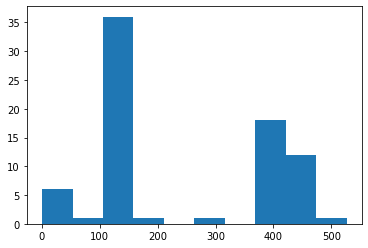

In [171]:
#8
plt.hist(data.num_of_words)

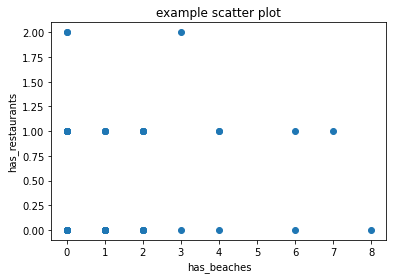

In [174]:
#9
plt.scatter(data.has_beaches, data.has_restaurants)
plt.xlabel("has_beaches")
plt.ylabel("has_restaurants")
plt.title("example scatter plot")
plt.show()


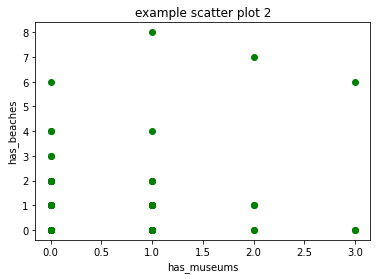

In [176]:
#10
plt.scatter(data.has_museums, data.has_beaches,color="g")
plt.xlabel("has_museums")
plt.ylabel("has_beaches")
plt.title("example scatter plot 2")
plt.show()